# Grip Progression

In [6]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import datetime as dt

In [7]:
# Load Json Data an map nested structures to columns in dataframes
with open('./data/grid-progression.json') as f: 
    progressionData = json.load(f) 

def normalizeJson( jsonEntry, idx ):
    df = json_normalize( data=jsonEntry['status'], meta=[ 'statusId','day'] )
    df['taskId'] = jsonEntry['task']
    df['sp'] = jsonEntry['sp']
    return df

dataFrames = [ normalizeJson(jsonItem, idx) for idx, jsonItem in enumerate(progressionData) ]
dfA = pd.concat(dataFrames).reset_index(drop=True)

dfA.head(5)

,statusName,statusId,date,day,taskId,sp
0,status-b,1,20150402,2,task-0000,3
1,status-c,2,20150403,3,task-0000,3
2,status-d,3,20150403,3,task-0000,3
3,status-i,-1,20150403,3,task-0000,3
4,status-b,1,20150403,3,task-0000,3


## Plot

In [8]:
dfPlot = dfA
listTasks = list(dfPlot.taskId.unique())

In [9]:
nCols = 1
nRows = len(listTasks) if(nCols==1) else   int(len(listTasks)/nCols)

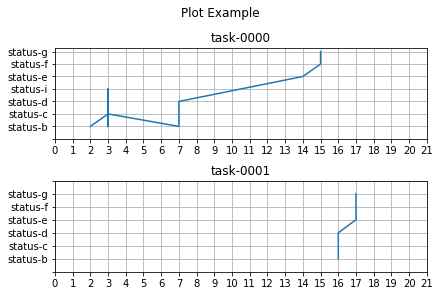

In [10]:
fig, axs = plt.subplots(ncols=nCols, nrows=nRows, constrained_layout=True)
fig.suptitle(f'Plot Example')
# fig.set_size_inches(8, 15)

custom_xlim = (0, 22)
custom_ylim = (-1, 7)

cursorCol = 0
cursorRow = 0

for _taskId in listTasks:
    dfBuf = dfPlot[dfPlot['taskId']== _taskId] 
        
    if( nRows == 1 or nCols == 1):
        a= axs[(cursorRow*cursorCol)+cursorCol]
    else:
        a= axs[cursorRow, cursorCol] 
        
    _x = dfBuf.day
    _y = dfBuf.statusName
    a.plot(_x, _y, zorder=3)
    
    a.grid()
    a.set_xticks(np.arange( 0, 22, 1.0))
    a.set_yticks(np.arange( -1, 7, 1.0))
    a.set_title( _taskId )

    cursorCol += 1
    if cursorCol > nCols:
        cursorCol = 0
        cursorRow += 1


## Show and save
plt.show()
# fig.savefig(reportFullPath)